# Clustering

---
<b>Lab 2: Illustration of clustering techniques with real datasets</b>
- Partitional clustering
- Quality indexes
- Hierarchical clustering

---

- Romain Billot            
- Yannis Haralambous        
- Philippe Lenca         
- Sorin Moga              

## Data presentation

–The Ruspini dataset– The first data we are going to use is the Ruspini data set, a two-dimensional
dataset traditionnally used to illustrate clustering partional techniques:

\begin{array}{rr} \hline
variable & Meaning \\ \hline
x &first \ coordinate  \\ \hline
y &second \ coordinate \\  \hline
\ \ \ \ \ \ \ Table 1: Variables \ of\ the\ ruspini\ dataset
\end{array}


–The food dataset– The second data contains information about food. Nutrient levels were measured
in a 3 ounce portion of various foods.

\begin{array}{rr} \hline
variable & Meaning \\ \hline
Name &name \ of\ the\ item  \\ \hline
Energy & number\ of\ calories \\  \hline
Protein &  amount\ of\ protein\ in\ grams\\  \hline
Fat & amount\ of\ fat\ in\ grams \\  \hline
Calcium& amount\ of\ calcium\ in milligrams \\  \hline
Iron& amount\ of\ iron\ milligrams \\  \hline
\ \ \ \ \ \ \ Table 2:\ Variables\ of\ the\ food.csv\ dataset
\end{array}

In [1]:
# import needed libraries:
%matplotlib notebook
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

#from matplotlib.colors import ListedColormap

##%matplotlib inline # allow us to see figures here in the notebook

### Question 1

Load and describe the 2 datasets. Thanks to boxplots, try to highlight some outliers, if any.

In [2]:
# load your data in this cell:
food=pd.read_csv('food.csv',sep=';')
ruspini=pd.read_csv('ruspini.csv')
ruspini.drop('Unnamed: 0',axis=1, inplace=True) # drops a useless column
# look at the first 5 rows of each dataset:
ruspini.head()
#food.head()  # remove comment to see the result for food dataset

,x,y
0,4,53
1,5,63
2,10,59
3,9,77
4,13,49


In [3]:
# this function should return a description about numerical features 
#for the datasets loaded above
def answer_1_1():
    descr_ruspini=ruspini.describe()
    descr_food=food.describe()
    return descr_ruspini,descr_food

answer_1_1()
    

(               x           y
 count   75.00000   75.000000
 mean    54.88000   92.026667
 std     30.50253   48.702620
 min      4.00000    4.000000
 25%     31.50000   56.500000
 50%     52.00000   96.000000
 75%     76.50000  141.500000
 max    117.00000  156.000000,
            Energy    Protein        Fat     Calcium       Iron
 count   27.000000  27.000000  27.000000   27.000000  27.000000
 mean   207.407407  19.000000  13.481481   43.962963   2.381481
 std    101.207806   4.251696  11.257033   78.034254   1.461305
 min     45.000000   7.000000   1.000000    5.000000   0.500000
 25%    135.000000  16.500000   5.000000    9.000000   1.350000
 50%    180.000000  19.000000   9.000000    9.000000   2.500000
 75%    282.500000  22.000000  22.500000   31.500000   2.600000
 max    420.000000  26.000000  39.000000  367.000000   6.000000)

<IPython.core.display.Javascript object>


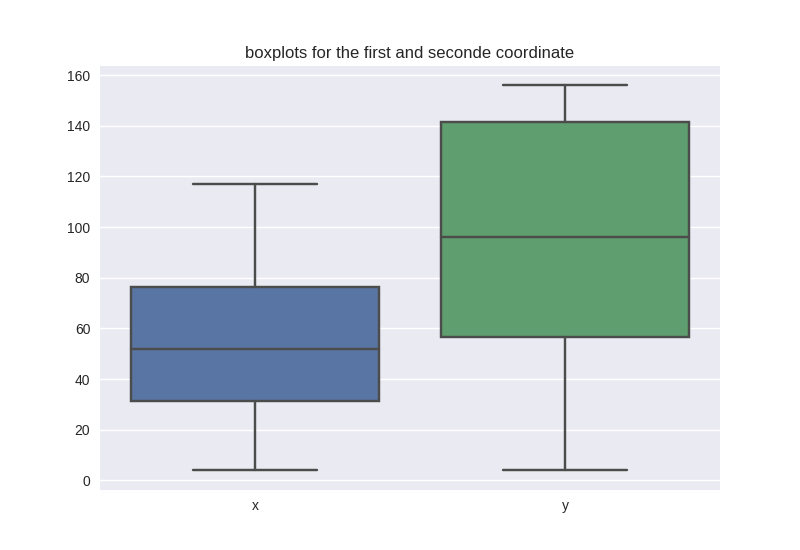

/opt/conda/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


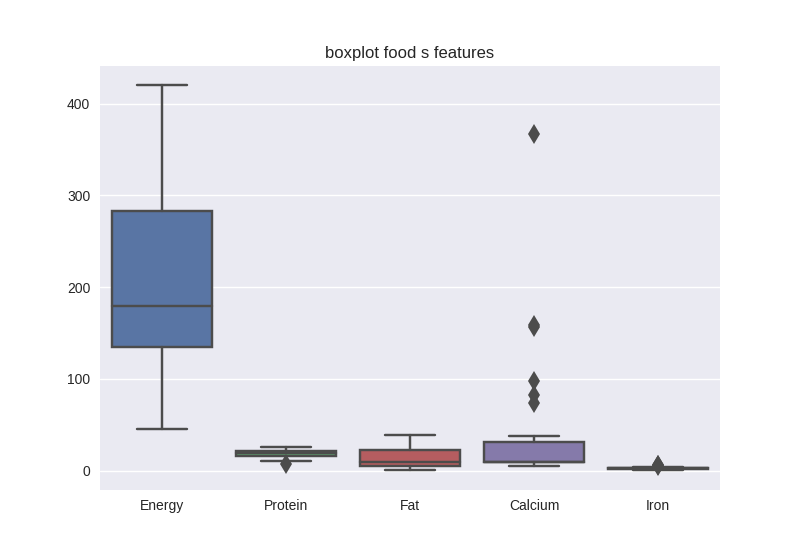

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff30ba8f278>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff3088c14e0>)

In [4]:
# this function should return 7 boxplots about all numerical features
# in order to figure out if any outliers exist
def answer_1_2():
    plt.figure()
    plt.title('boxplots for the first and seconde coordinate')
    ruspini_box=sns.boxplot(ruspini,fliersize=10)
    plt.show()
    plt.figure()
    plt.title('boxplot food s features')
    food_box=sns.boxplot(food,fliersize=10)   # fliersize is the size used to indicate the outliers
    plt.show()
    return ruspini_box,food_box
answer_1_2()
    

<mark><b>Conclusion:
                     - Iron, Calcium and Protein present outliers
                     - Look at different scales presented in the food dataset ( maybe some scaling will be necessary ;) )
</b></mark>

## Partitional clustering and quality of a clustering

For the illustration of the algorithms seen during the lecture class, we will use the Ruspini dataset.

### Question 2

Plot the data in a 2D space. What can you say about the structure of the data? How many cluster
do you expect to be found by the clustering algorithms?

<IPython.core.display.Javascript object>


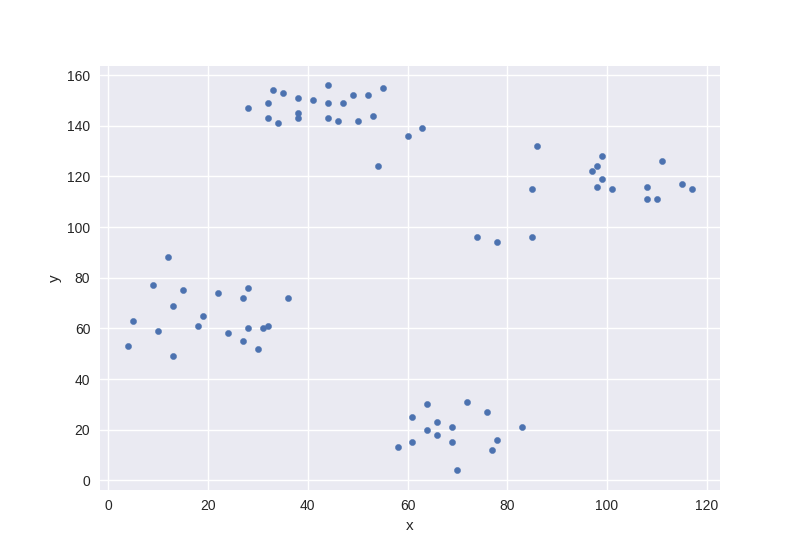

In [5]:
# this funstion should return a scatter plot for ruspini dataset
def answer_2():
    ax=ruspini.plot.scatter('x','y')
    return ax
answer_2()

<mark> <b> Comment: We can say that the ruspini dataset present 4 clusters</b></mark>

Optional: Below you would find the code of Hopkins statistic which used to measure the clustering tendency

To understand more about the clustering tendency, please visit the link below: <br/>
http://www.sthda.com/english/wiki/assessing-clustering-tendency-a-vital-issue-unsupervised-machine-learning

source code from here :https://matevzkunaver.wordpress.com/2017/06/20/hopkins-test-for-cluster-tendency/

In [6]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

In [7]:
#  the closer the value to 1, the higher the likelihood of clusters. ( please note that the function in R: 
#the closer the value to 0, the higher the likelihood of clusters)
s=0
for i in range(101):
    s+=hopkins(ruspini)
print(s/100)

0.796067760392


### Question 3

Run a k-means algorithm with a given number of clusters. Plot the ruspini data set and assign to
each point a specific color according to its group. Repeat the same operation several times while
vizualizing the results. What do you remark ?

In [8]:
# import useful libraries
from sklearn.cluster import KMeans

In [9]:
# this function should fit a clustering model using the ruspini dataset, the return the cluster_centers
# run this cell several times to figure out the issue involved here.
def answer_3_1():
    # write your code here 
    kmeans = KMeans(n_clusters=4).fit(ruspini)
    centers=kmeans.cluster_centers_
    return centers
answer_3_1()


array([[  98.17647059,  114.88235294],
       [  20.15      ,   64.95      ],
       [  43.91304348,  146.04347826],
       [  68.93333333,   19.4       ]])

The issue is about the random selection of initial centroids, each time the chosen points will affect the final result. To overcome this issue we will use the result in Question 4

### Question 4

Try to tune some parameters found KMeans documentation in order to fix the issue seen before

In [10]:
def answer_3_2():
    # write your code here 
    kmeans = KMeans(n_clusters=4,n_init=40).fit(ruspini) # we can use random_state to make result reusable later
    centers=kmeans.cluster_centers_
    return centers
answer_3_2()
 # now we get always the same result    

array([[  20.15      ,   64.95      ],
       [  43.91304348,  146.04347826],
       [  68.93333333,   19.4       ],
       [  98.17647059,  114.88235294]])

### Question 5

Determining the optimal number of clusters is a critical issue in clustering. In many applications,
in the real life, this optimal number is not obvious and we use quality indexes that will evaluate
the quality of a clustering. For example, some quality indexes are based on the idea that a good
clustering is composed of compact and well-separated clusters. The idea is then to launch several
runs of a clustering algorithm with various initial numbers of clusters. The optimal number
of cluster is the one for which the quality index is maximized. In this question we illustrate this
procedure with the silhouette index that you can find in the cell below ( R provides already the FPC package). You are asked to understand the code below that computes the silhouette for a k-means clustering of the Ruspini dataset with a initial
number of clusters ranging from 2 to 10 and plots the evolution of the silhouette index against the
initial number of clusters. What is your conclusion ?

<IPython.core.display.Javascript object>


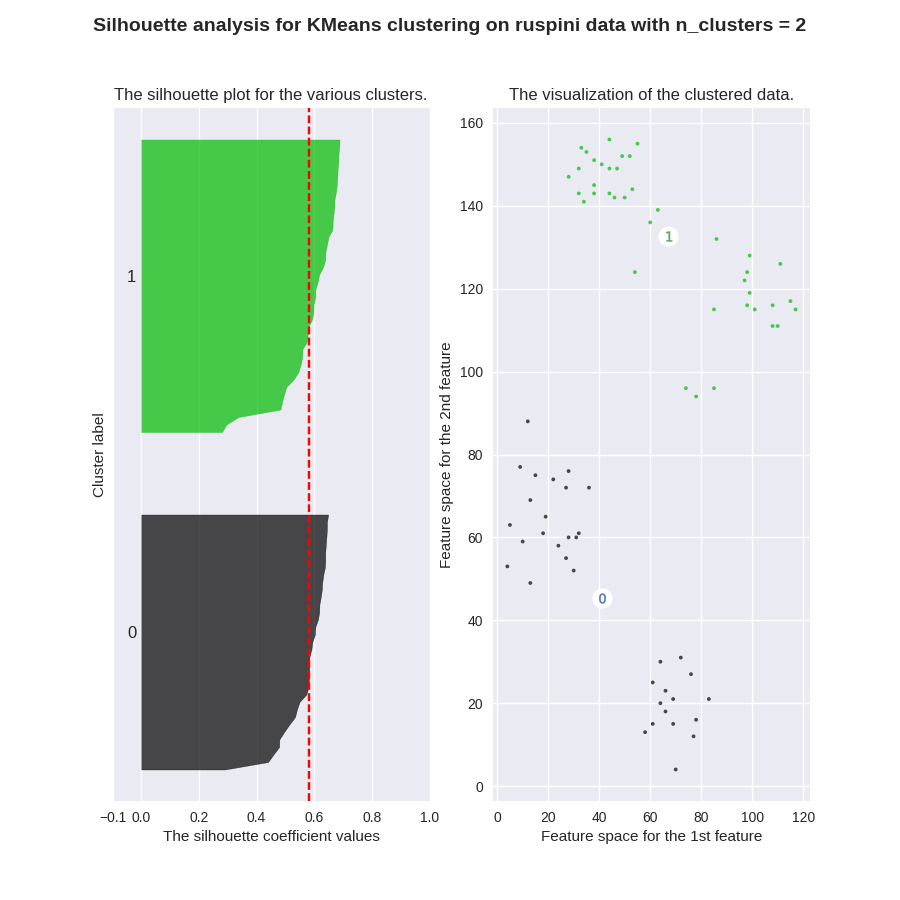

For n_clusters = 2 The average silhouette_score is : 0.582726420815


<IPython.core.display.Javascript object>


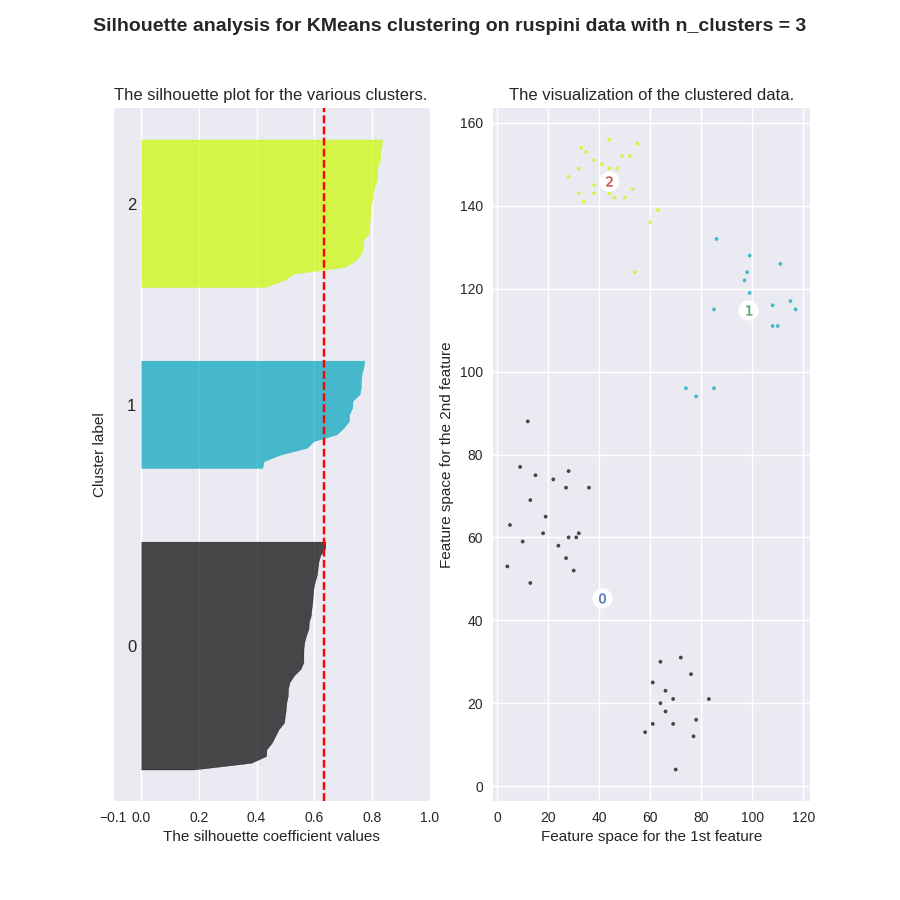

For n_clusters = 3 The average silhouette_score is : 0.632704714035


<IPython.core.display.Javascript object>


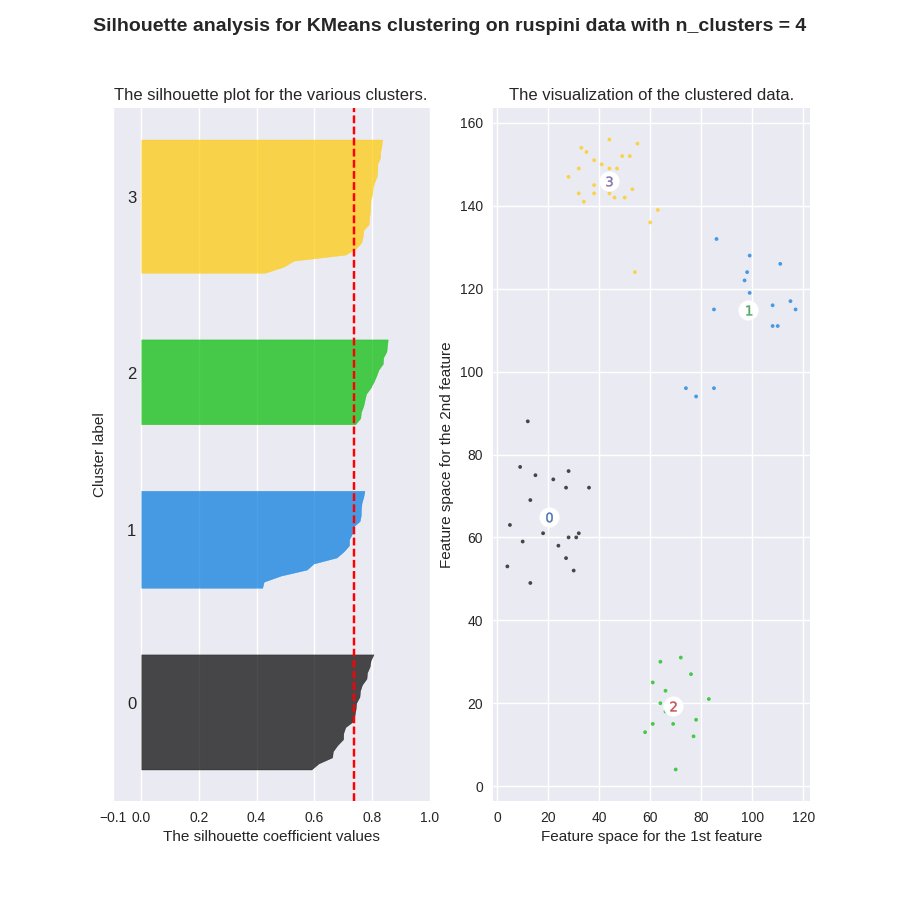

For n_clusters = 4 The average silhouette_score is : 0.737656990881


<IPython.core.display.Javascript object>


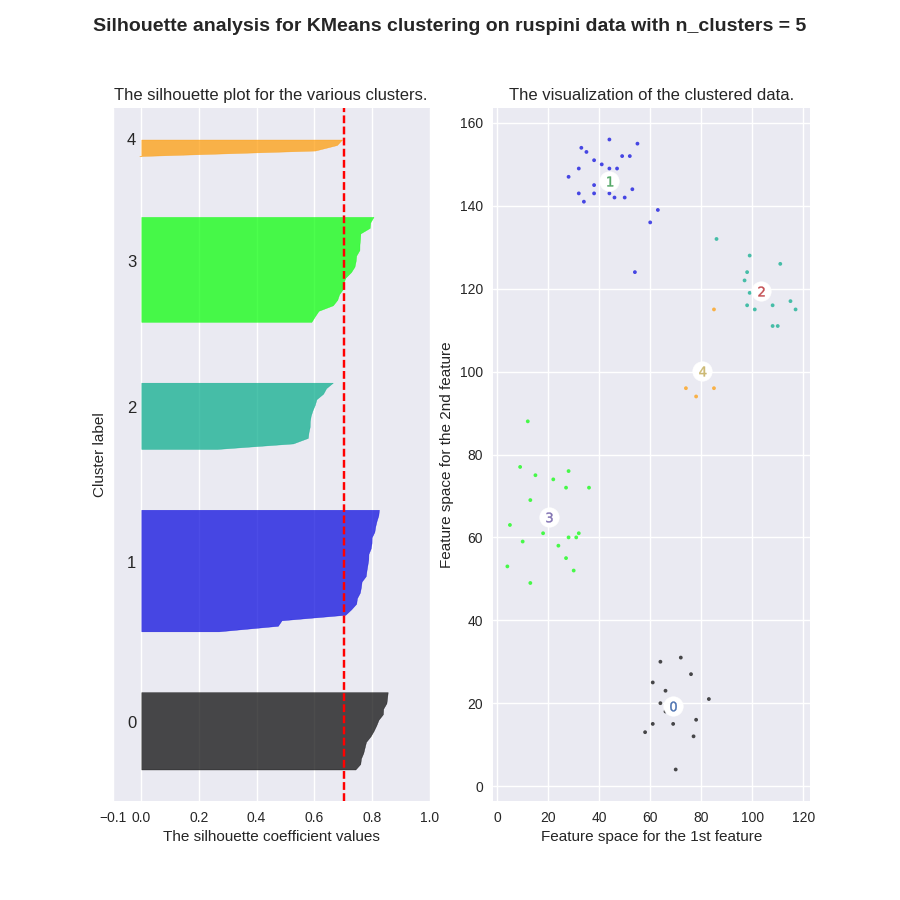

For n_clusters = 5 The average silhouette_score is : 0.701924141357


<IPython.core.display.Javascript object>


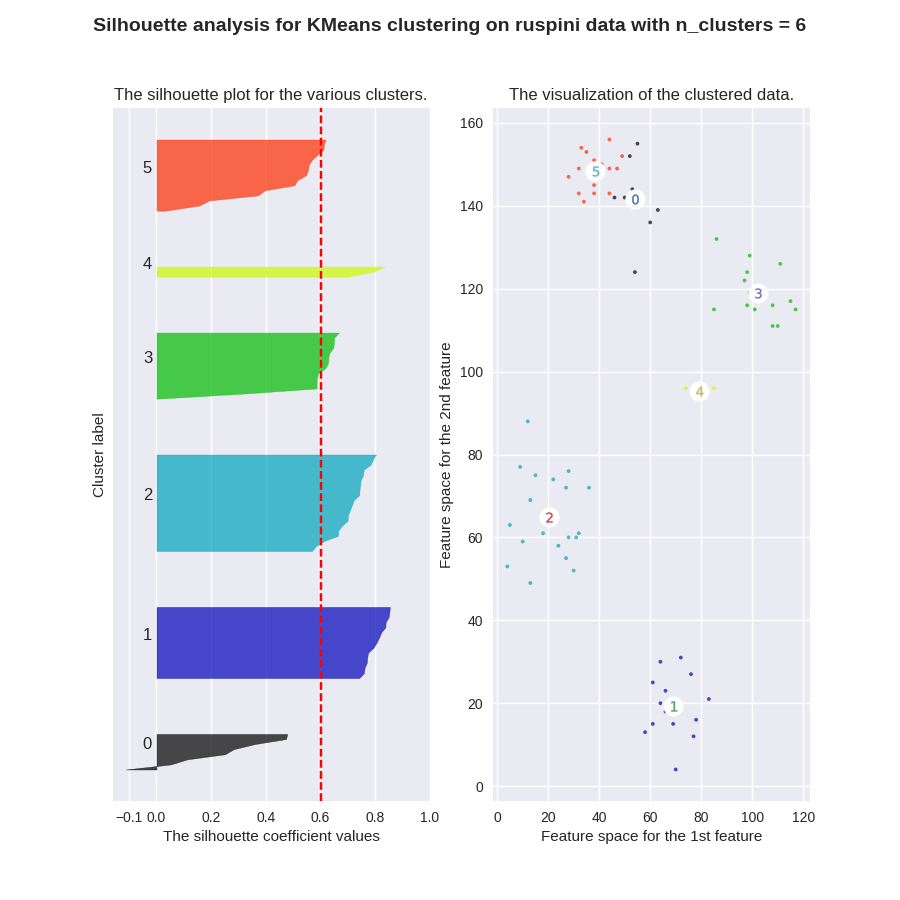

For n_clusters = 6 The average silhouette_score is : 0.601608861995


<IPython.core.display.Javascript object>


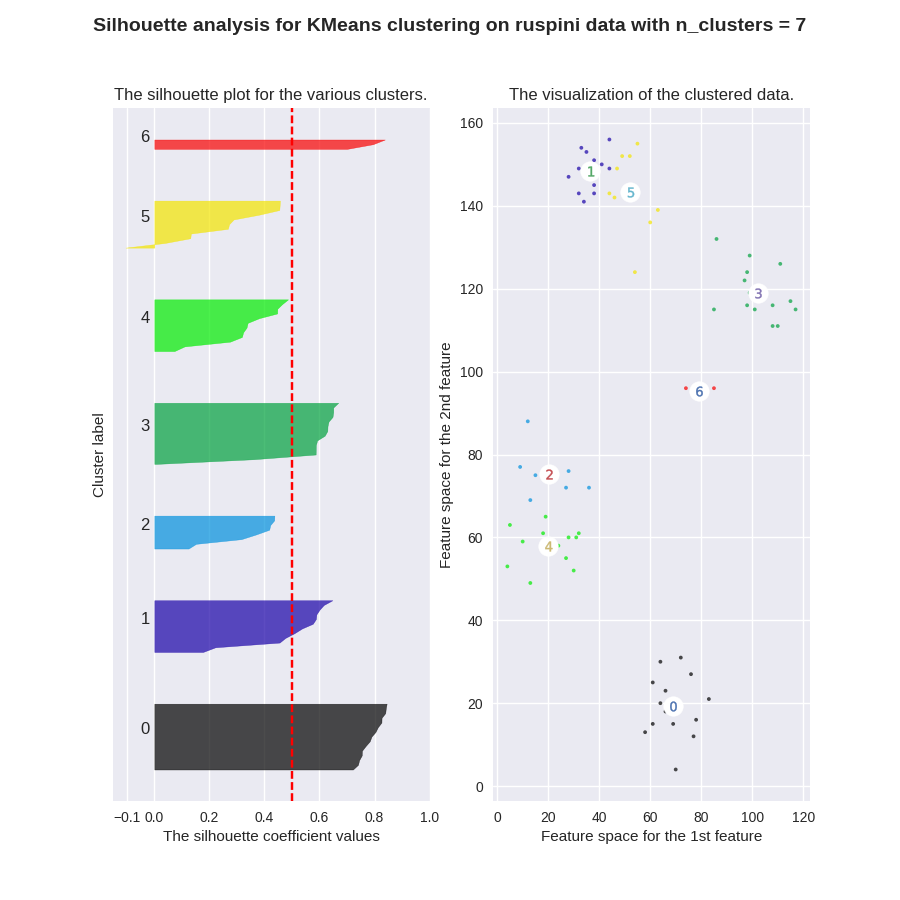

For n_clusters = 7 The average silhouette_score is : 0.499206092667


<IPython.core.display.Javascript object>


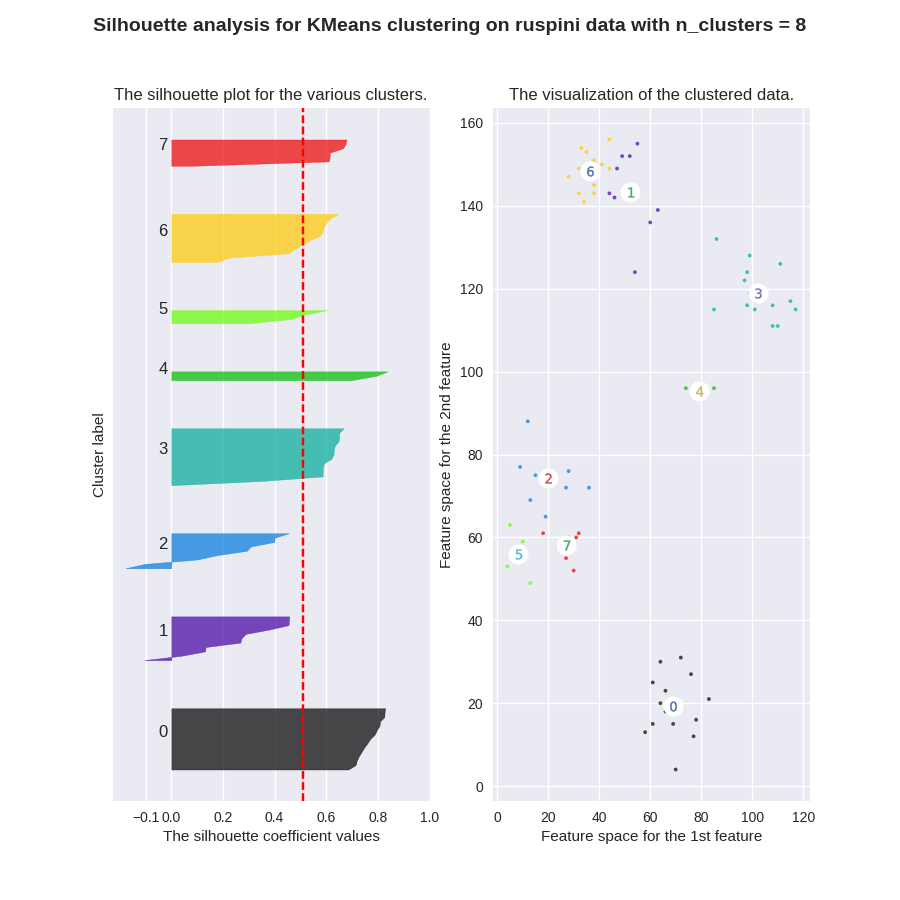

For n_clusters = 8 The average silhouette_score is : 0.5085498842


<IPython.core.display.Javascript object>


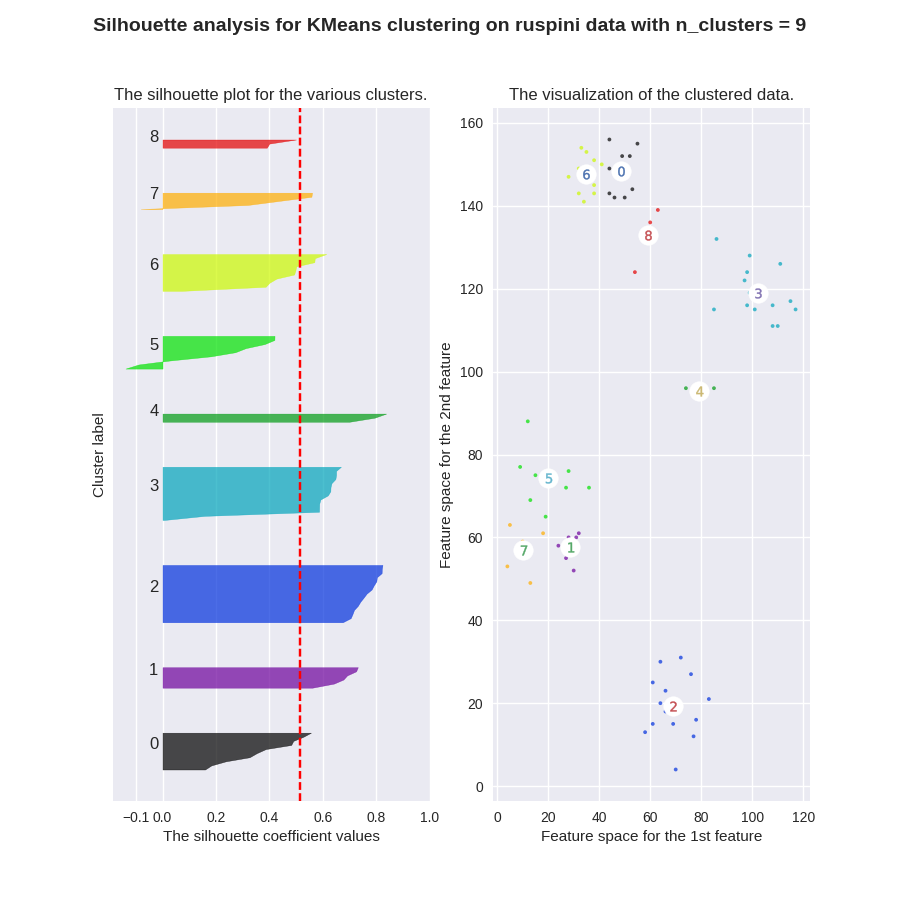

For n_clusters = 9 The average silhouette_score is : 0.513805848738


<IPython.core.display.Javascript object>


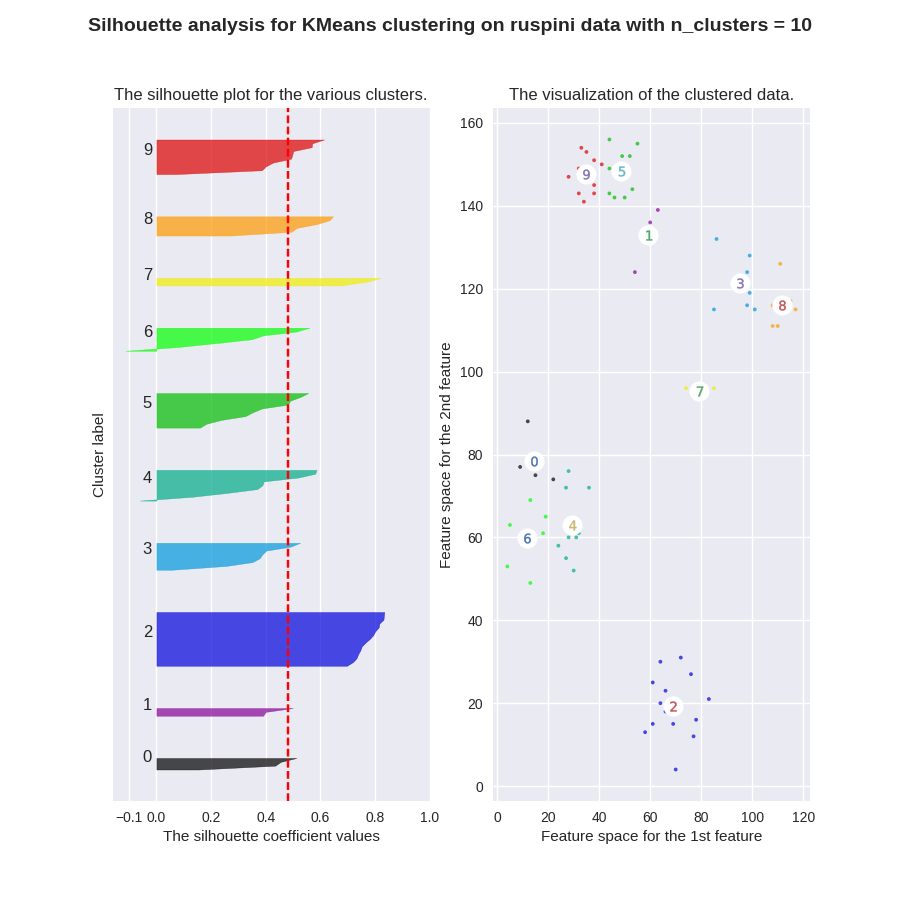

For n_clusters = 10 The average silhouette_score is : 0.482116780493


In [11]:
def answer_5(dataset):
    range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]  
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(9,9)

        # The 1st subplot is the silhouette plot
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(dataset)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(dataset, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(dataset, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on ruspini data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()
        
answer_5(ruspini)
# the function above was modified using the source code below:
# http://www.ressources-actuarielles.net/C1256F13006585B2/0/443491C8067B1DC8C125758F0063B067/$FILE/RapportCB.html?openelement

<mark><b>Conclusion: K=4 is the best numeber of clusters( the best silhouette value)</b></mark> 

### Question 6

The PAM algorithm stands for Partitioning Around Medoïds. It is a more robust version than
the classic kmeans algorithm specially when your data pronounces outliers( we will see its advantage in food dataset). Verify it by applying a PAM procedure to our Ruspini data set
(cluster package). What can you conclude about the robustness or stability of the algorithm?
Explore the features of the cluster package, for example by plotting the object resulting from the
pam clustering

In [23]:
def answer_6():
    # write your code here :
    
    return " Looking for a an implementation for PAM"
answer_6()

' Lookin for a an implementation for PAM'

## Hierarchical clustering

### Question 7

Have a first look at this dataset and try to make a partitional algorithm procedure like before.

In [13]:
# this function should return the first 3 rows of food dataset
def answer_7_1():
    return food.head(3)
answer_7_1()
    

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0


<IPython.core.display.Javascript object>


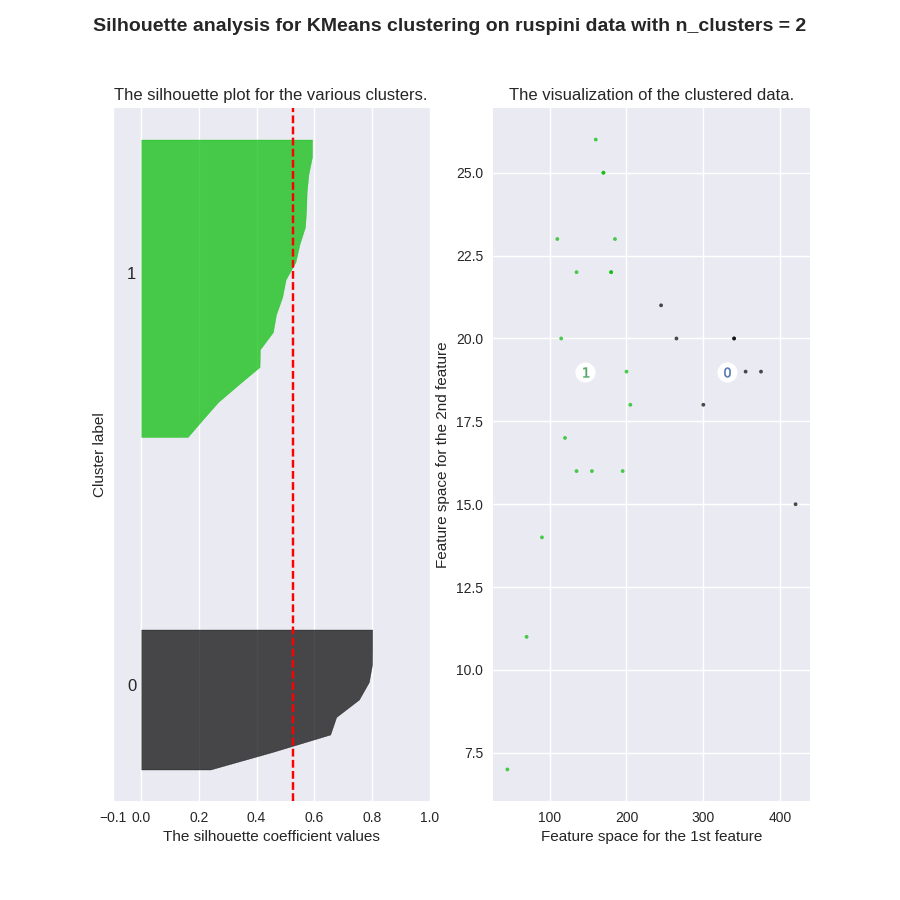

For n_clusters = 2 The average silhouette_score is : 0.527576126838


<IPython.core.display.Javascript object>


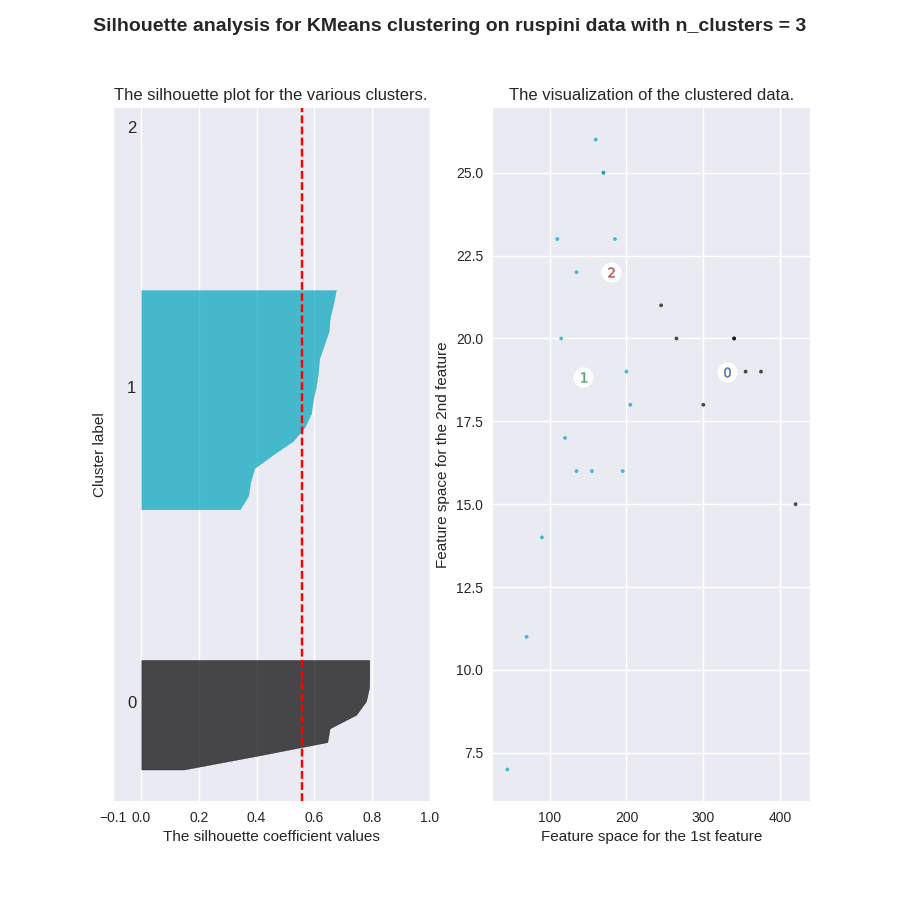

For n_clusters = 3 The average silhouette_score is : 0.558337826795


<IPython.core.display.Javascript object>


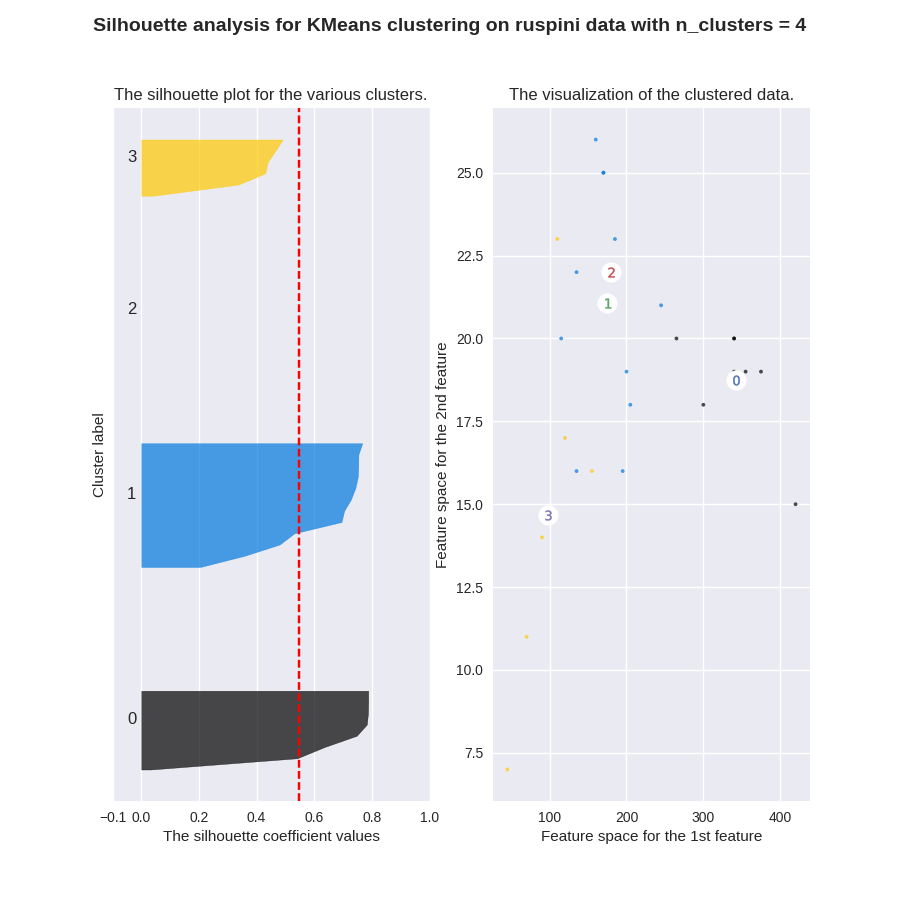

For n_clusters = 4 The average silhouette_score is : 0.546827511234


<IPython.core.display.Javascript object>


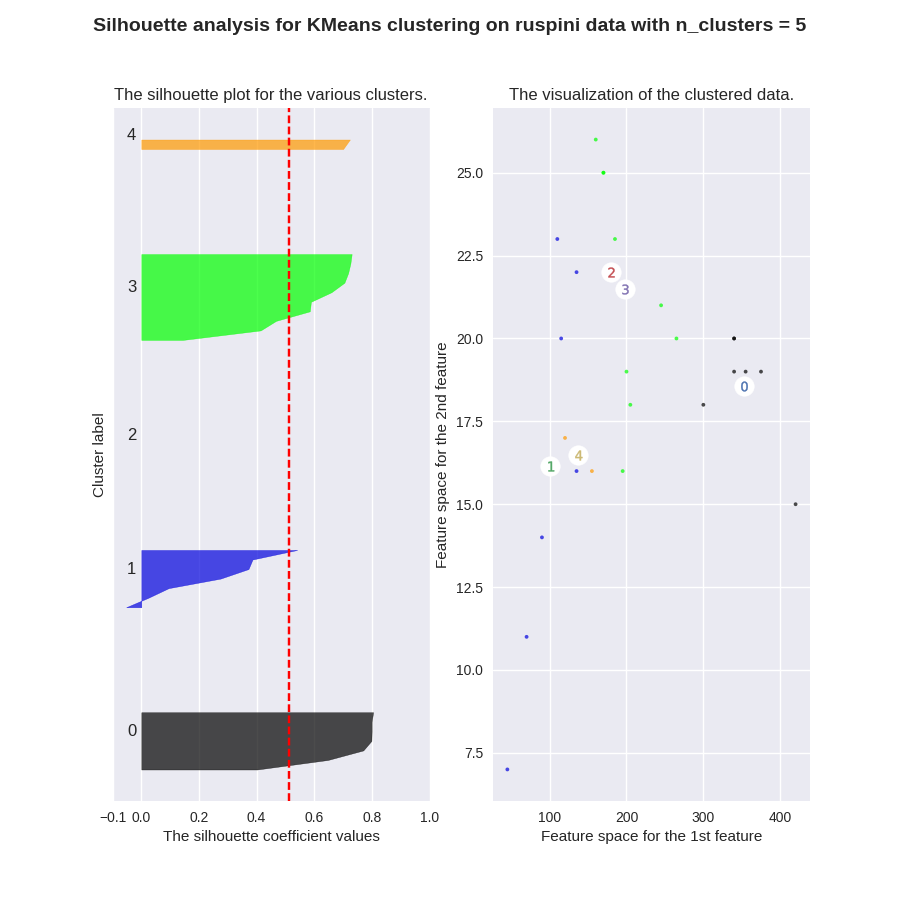

For n_clusters = 5 The average silhouette_score is : 0.511718135177


<IPython.core.display.Javascript object>


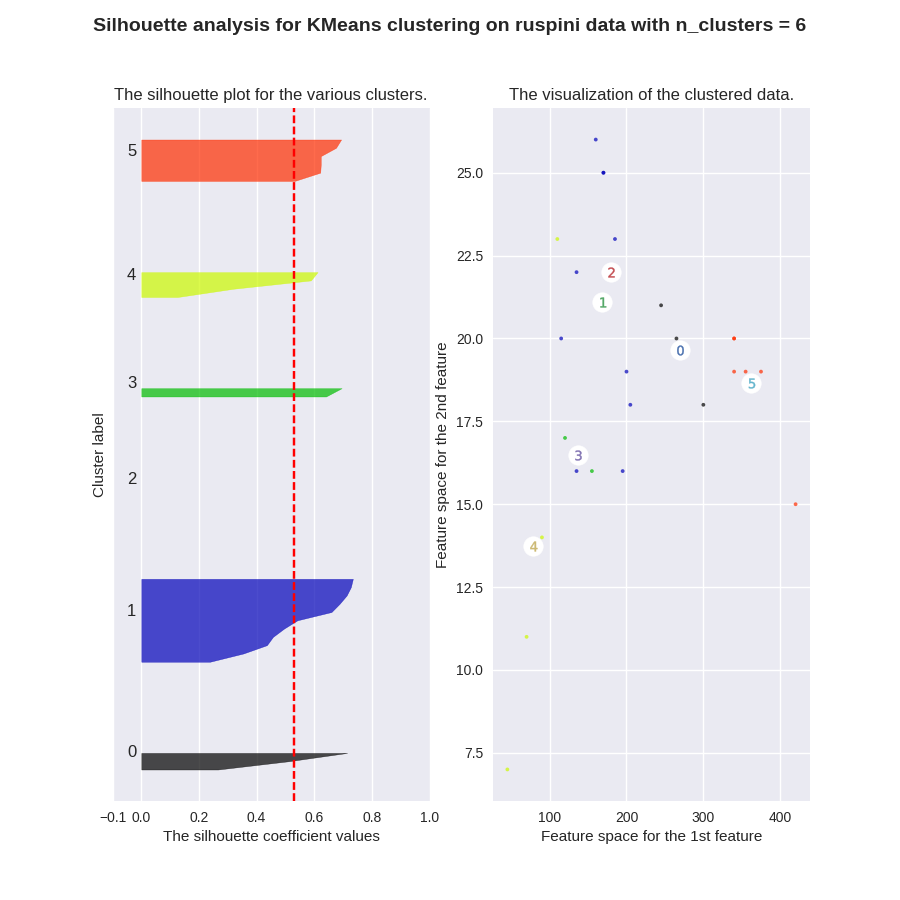

For n_clusters = 6 The average silhouette_score is : 0.528812979286


<IPython.core.display.Javascript object>


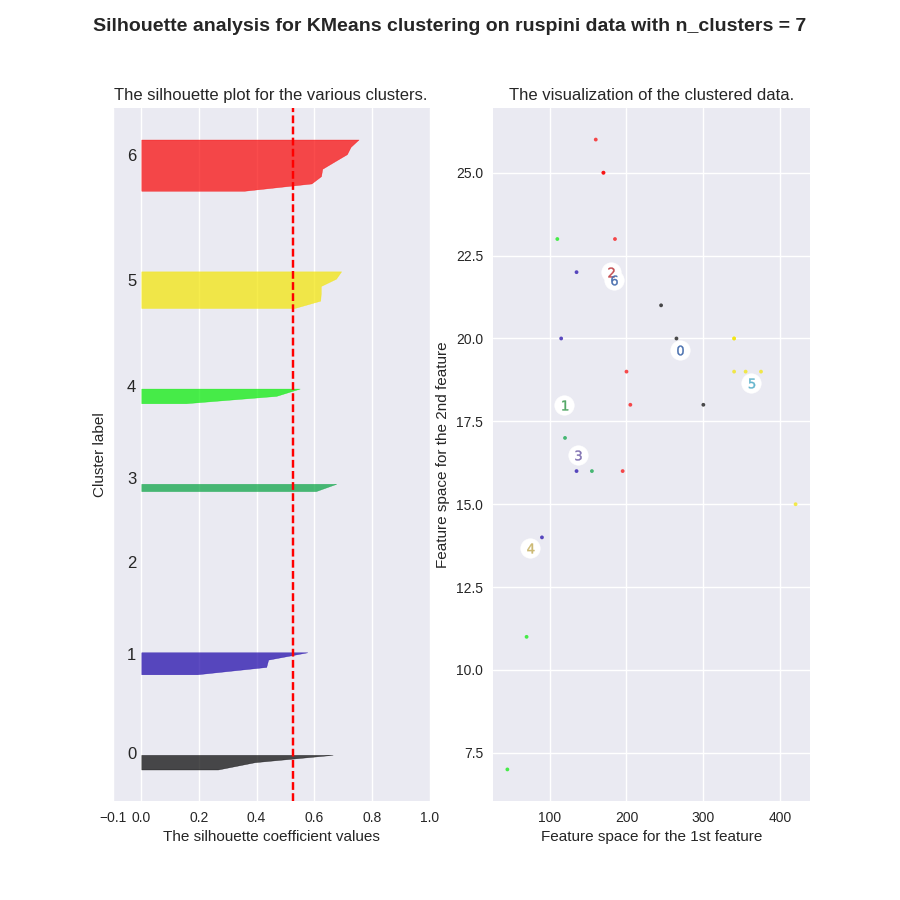

For n_clusters = 7 The average silhouette_score is : 0.527630754296


<IPython.core.display.Javascript object>


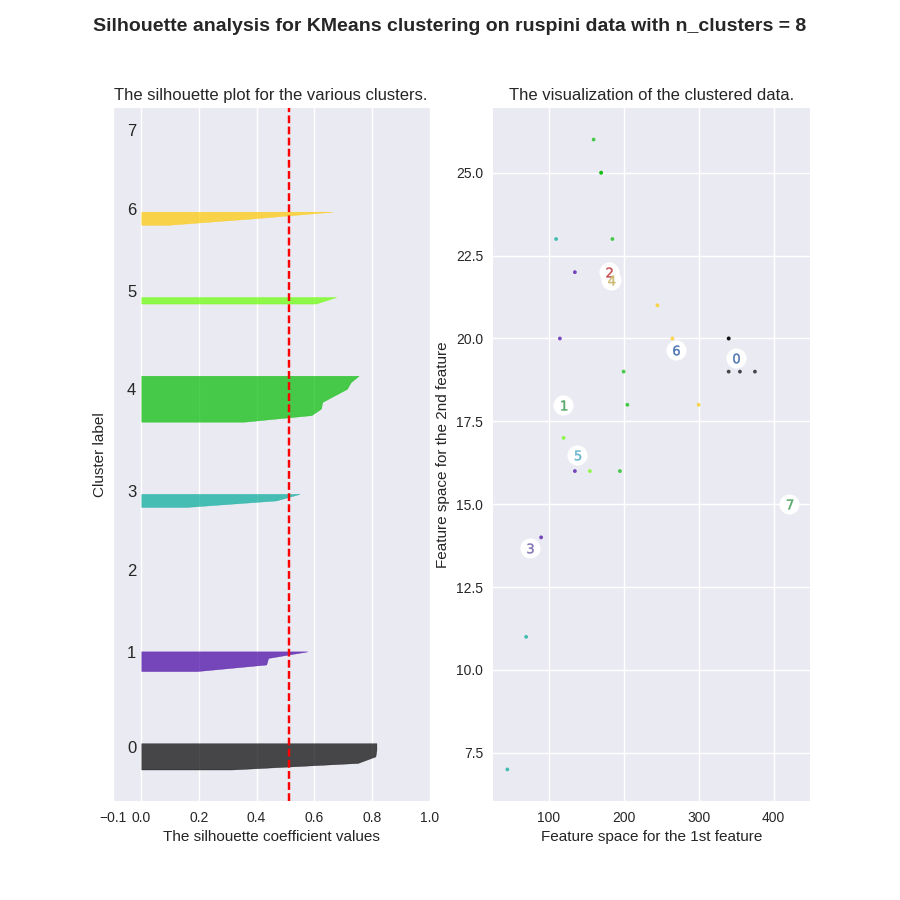

For n_clusters = 8 The average silhouette_score is : 0.511695692693


<IPython.core.display.Javascript object>


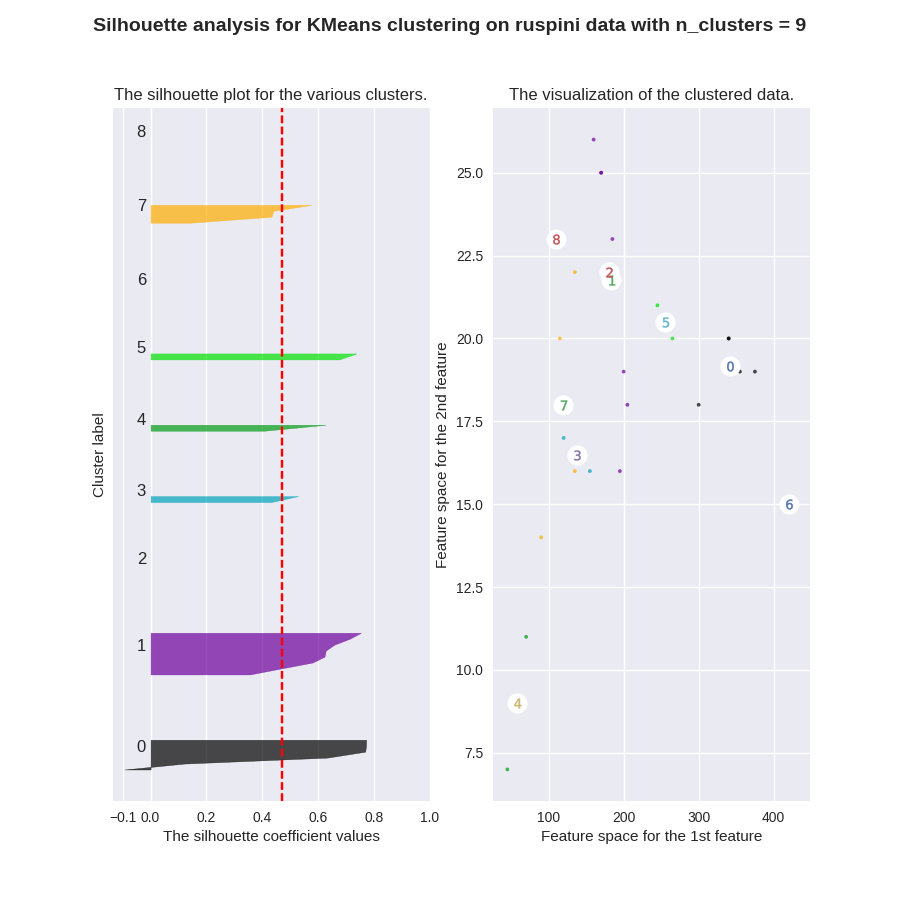

For n_clusters = 9 The average silhouette_score is : 0.472450501514


/opt/conda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


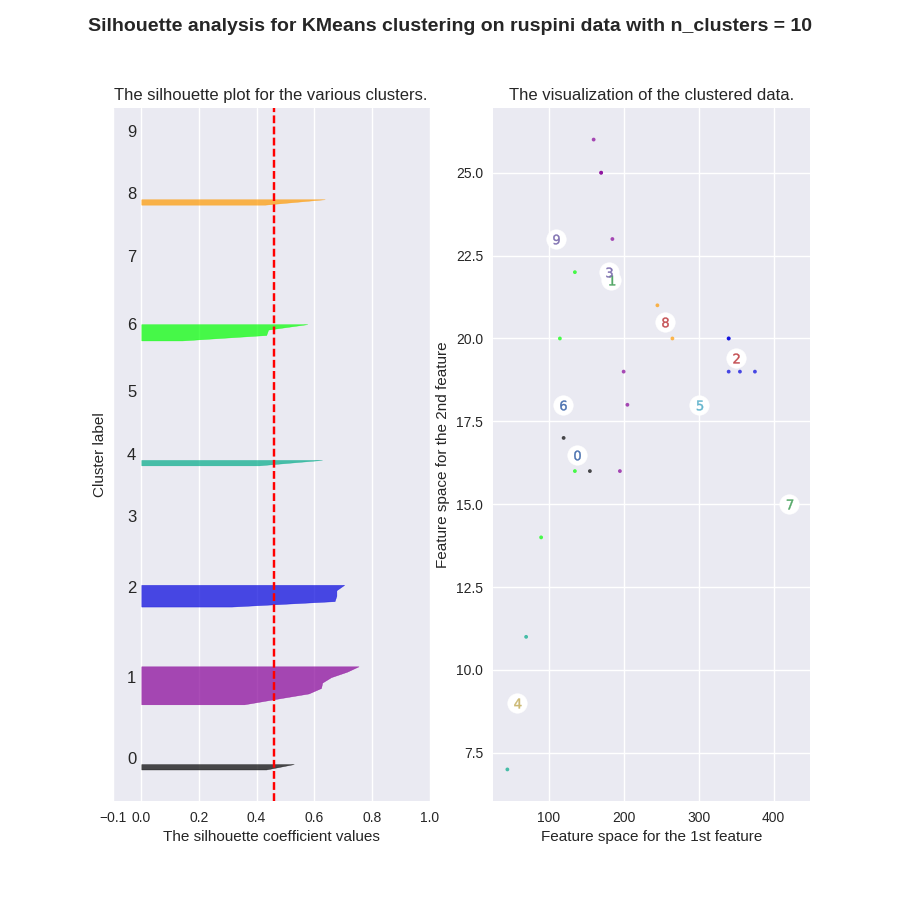

For n_clusters = 10 The average silhouette_score is : 0.461939459857


In [14]:
# this function should return the same result as answer_5 but for food dataset
def answer_7_2():
    food.set_index('Name',inplace=True)  # Kmeans deals only with numerical features, so we put the name as an index or delete it
    return answer_5(food)   # plots are in 2D , but so it may not be consistent due to the fact that we have 4 features
answer_7_2()

<mark><b>Conclusion: K=3 seems the best number for clusters</b></mark>

### Question 8

Perform a hierarchical clustering by first standardizing the colums of interest, then computing a
dissimilarity between the objects, and finally running an agglomerative algorithm to yield a dendrogram.
Interpret the results.

In [15]:
# this function should return a statistical descriptive about numerical features in food datasets
# you can use your answer in answer_1_1 by  returing the seconde element in your tuple 
def answer_8_1():
    return answer_1_1()[1]
answer_8_1()
# look at the results to make sure that normalization is important in this case 

,Energy,Protein,Fat,Calcium,Iron
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,207.407407,19.000000,13.481481,43.962963,2.381481
std,101.207806,4.251696,11.257033,78.034254,1.461305
min,45.000000,7.000000,1.000000,5.000000,0.500000
25%,135.000000,16.500000,5.000000,9.000000,1.350000
50%,180.000000,19.000000,9.000000,9.000000,2.500000
75%,282.500000,22.000000,22.500000,31.500000,2.600000
max,420.000000,26.000000,39.000000,367.000000,6.000000


In [16]:
# this function should return the dataset food scaled
def answer_8_2():
    
    from sklearn.preprocessing import scale
    
    food_scaled=pd.DataFrame(scale(food),columns=food.columns,index=food.index)  # scale(food) returns a numpy array, so use pd.Dataframe 
                                                                # to reconstruct your dataframe
    
    return food_scaled
answer_8_2().head()
    
    

,Energy,Protein,Fat,Calcium,Iron
Name,,,,,
Braised beef,1.335059,0.239681,1.314297,-0.456581,0.152385
Hamburger,0.378515,0.479361,0.318516,-0.456581,0.222121
Roast beef,2.140569,-0.958723,2.310078,-0.482699,-0.266028
Beefsteak,1.687470,0.000000,1.676399,-0.456581,0.152385
Canned beef,-0.275962,0.719042,-0.315163,-0.352109,0.919476


To learn more about dendrogram: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [17]:
#this function should return a Z cluster linkage array (contains the hierarchical clustering information) 
def answer_8_3():
    # write your code here
    food_scaled=answer_8_2()   # data scaled, please refer to answer_8_2()
    Z = linkage(food_scaled, 'ward')     # 'ward' is one of the methods used to compute distances between newly clusters formed
    return  Z                            # the metric used by default is 'euclidean'

answer_8_3()[0:7]   # look at the fisrt 7 rows of the array Z and try to understand the meaning of each row

array([[  0.        ,  10.        ,   0.06973555,   2.        ],
       [ 11.        ,  12.        ,   0.18939102,   2.        ],
       [  6.        ,  25.        ,   0.21915945,   2.        ],
       [ 27.        ,  28.        ,   0.41581508,   4.        ],
       [  1.        ,   8.        ,   0.4202579 ,   2.        ],
       [  3.        ,  30.        ,   0.57241854,   5.        ],
       [  4.        ,  14.        ,   0.75192779,   2.        ]])

/opt/conda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


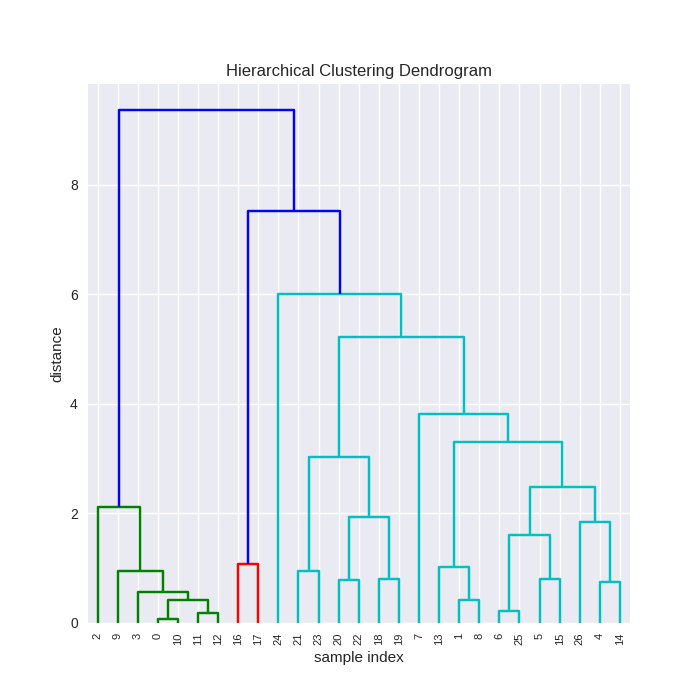

In [18]:
# calculate full dendrogram
def answer_8_4():
    
    plt.figure(figsize=(7, 7))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(
        answer_8_3(),
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
    )
    plt.show()
answer_8_4() # See how the dendrogramm was formed and try to make a link between Z and your dendrogram

### Question 9

Try to hightlight the impact of the chosen distance on the results. Next, try to show the impact
of the agglomerative criteria on the results

In [19]:
#using the lists provided  below: metrics,pdists and methods, try to compute the  Cophenetic Correlation Coefficient 
# using the  cophenet() function for each triple of values
#The closer the value is to 1, the better the clustering preserves the original distances,
def answer_9():
    from scipy.cluster.hierarchy import cophenet
    from scipy.spatial.distance import pdist
    metrics=['euclidean','hamming', 'cityblock' , 'cosine'] # metrics used for linkage 
    methods=['single','complete','average'] # methods used for linkage
    pdists=['euclidean','minkowski','cityblock','cosine']  # metrics used for pdist()
    max=0
    best_metric=None
    best_method=None
    best_p_dist=None
    food_scaled=answer_8_2()
    for metric1 in metrics:
        for method1 in methods:
            for pdist1 in pdists:
                Z=linkage(food_scaled,method1,metric=metric1)
                c, coph_dists = cophenet(Z, pdist(food_scaled,pdist1))
                if (c>max):
                    max=c
                    best_metric=metric1
                    best_method=method1
                    best_p_dist=pdist1
                else:
                    max=max
                print('(',method1,',',metric1,',',pdist1,') :',c)
    print('the best cophenet index is about :',max,'which corresponds to the triple: (metric=',best_metric,',method=',best_method,'and pdist=',best_p_dist)
answer_9()  # 

( single , euclidean , euclidean ) : 0.774930028936
( single , euclidean , minkowski ) : 0.774930028936
( single , euclidean , cityblock ) : 0.731962429122
( single , euclidean , cosine ) : 0.29720215087
( complete , euclidean , euclidean ) : 0.713676143919
( complete , euclidean , minkowski ) : 0.713676143919
( complete , euclidean , cityblock ) : 0.698650330921
( complete , euclidean , cosine ) : 0.563544096473
( average , euclidean , euclidean ) : 0.864670129696
( average , euclidean , minkowski ) : 0.864670129696
( average , euclidean , cityblock ) : 0.793164600041
( average , euclidean , cosine ) : 0.460759215034
( single , hamming , euclidean ) : 0.277196432863
( single , hamming , minkowski ) : 0.277196432863
( single , hamming , cityblock ) : 0.280962336399
( single , hamming , cosine ) : 0.297648371423
( complete , hamming , euclidean ) : 0.36549866546
( complete , hamming , minkowski ) : 0.36549866546
( complete , hamming , cityblock ) : 0.390876314831
( complete , hamming , 

In [20]:
#len(pdist(food_scaled)) #pdist computes the pairwise distances between observations, in our case we have 27 observation, so in total
# pdist will contain 26+25+24+.....+1= 26(26+1)/2 = 351 = len(pdist)
# each value is a distance between two observation
# for example: pdist[food_scaled] is the first value in our array, if you compare this value to: pdist(food_scaled.head(2))
# you will find that they are the same, because pdist(food_scaled.head(2)) computes the distance between the first row and 
# the seconde row
#import scipy
#scipy.spatial.distance.pdist(answer_8_2())[0]

In [21]:
# this is a provided function from( https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)
# which allows you to plot a horizontal line on you dendrogram witha specified height 
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata
# to call the function above is similar to the function dendrogram(), you need just to add the argument max_d which specifies 
# the height to cut on.

/opt/conda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


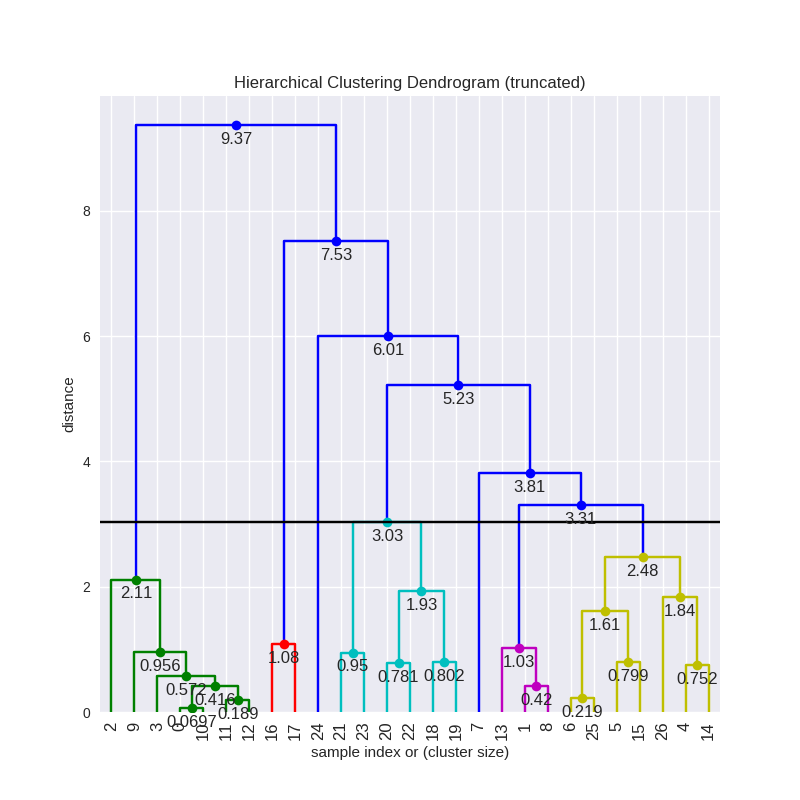

In [22]:
# this function should a return a dendrogram with a horizontal line specifing the number of clusters 
def answer_10():
    
    plt.figure(figsize=(8, 8))
    plt.title('Hierarchical Clustering Dendrogram with cut-off line')
    plt.xlabel('sample_index')
    plt.ylabel('distance')
    fancy_dendrogram(
    answer_8_3(),
    leaf_rotation=90.,
    leaf_font_size=12.,
    max_d=3.04,
    )
    plt.show()
answer_10() #  the number of intersection of the horizontal line with the dendrogramm is exactly th number of clusters